In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import library as lib
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# Set the seed for consistent results
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

In [3]:
image_filepath = "../images/plots"

In [4]:
# Import Dataset
df = lib.import_music_df()
df.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.16,0.691,106.662
1,El Paso,Marty Robbins,3,1960,2,1,0.654,0.452,2.0,-9.709,0.0300,0.835,0.16,0.691,106.662
2,El Paso,Marty Robbins,29,1960,2,29,0.654,0.452,2.0,-9.709,0.0300,0.835,0.16,0.691,106.662
3,El Paso,Marty Robbins,86,1960,3,28,0.654,0.452,2.0,-9.709,0.0300,0.835,0.16,0.691,106.662
4,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,0.0264,0.762,0.13,0.586,94.267


In [5]:
#show data columns
df.columns

Index(['Track', 'Artist', 'Placement', 'Year', 'Month', 'Day', 'danceability',
       'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

In [6]:
#drop Unnamed column
df = df.sort_values('Placement').drop_duplicates('Track', keep='last')
attribute_df = df[['danceability', 'energy', 'key', 'loudness', "speechiness", 'acousticness', 'liveness', 'valence', 'tempo']]
attribute_df

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo
7712,0.479,0.733,0.0,-8.753,0.0256,0.3060,0.4140,0.806,99.307
6351,0.423,0.681,10.0,-9.756,0.0397,0.0592,0.0889,0.559,110.461
4786,0.564,0.827,7.0,-7.089,0.0283,0.0904,0.1270,0.912,89.847
4105,0.673,0.349,4.0,-12.414,0.0368,0.6080,0.3800,0.609,124.451
7045,0.609,0.818,5.0,-4.620,0.0425,0.1140,0.0999,0.922,78.955
...,...,...,...,...,...,...,...,...,...
6347,0.699,0.627,7.0,-10.027,0.0269,0.2250,0.0466,0.847,134.906
40162,0.859,0.680,10.0,-9.213,0.1590,0.0289,0.2610,0.753,91.444
23060,0.535,0.716,4.0,-5.025,0.0431,0.3260,0.6590,0.901,94.379
32093,0.576,0.268,0.0,-14.313,0.0294,0.5470,0.1180,0.175,115.952


## Machine Learning

In [7]:
lists = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(attribute_df)
    lists.append(kmeanModel.inertia_)

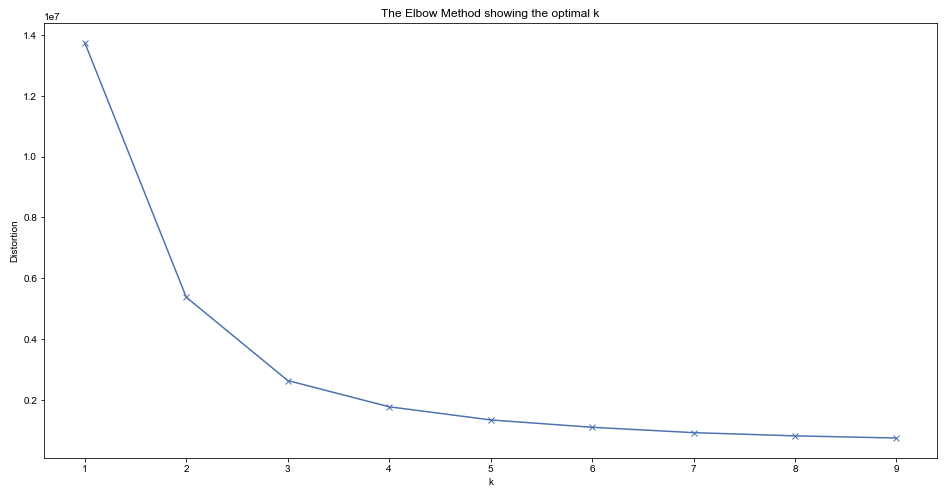

In [8]:
plt.figure(figsize=(16,8))
plt.plot(K, lists, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig(f"{image_filepath}/elbow.png")
sns.set_theme()
plt.show()

## Without Scaling

In [9]:
# Create a kmeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(attribute_df)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters_no_scale = kmeans.predict(attribute_df)
attribute_df["Cluster"] = predicted_clusters_no_scale

C:\Users\wollm\anaconda3\envs\PythonML\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


### Cluster Quality

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculate Silhoutte Score
#
score = silhouette_score(attribute_df, kmeans.labels_)
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.508


The Silouetter Score is between -1 to 1. If the value is closer to 1, the clusters are more dense and
and separated from other clusters.

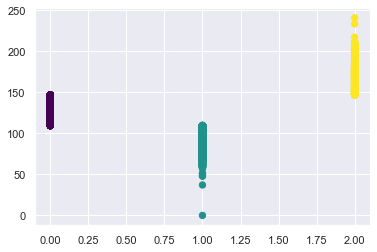

In [11]:
# Plot the clusters
plt.scatter(attribute_df['Cluster'], attribute_df['tempo'], c=attribute_df['Cluster'], s=40, cmap='viridis')
plt.show()

### Save to File

In [12]:
lib.save_model(kmeans, "without-scaling")

## With Scaling

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

attribute_df = attribute_df.drop("Cluster", axis=1)
X_scaled = scaler.fit_transform(attribute_df)
X_scaled_df = pd.DataFrame(scaler.fit_transform(attribute_df), columns=attribute_df.columns, index=attribute_df.index)
X_scaled_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo
7712,0.484818,0.730310,0.000000,0.635764,0.026947,0.307845,0.406694,0.813320,0.412047
6351,0.428138,0.677189,0.909091,0.602685,0.041789,0.059555,0.076978,0.564077,0.458327
4786,0.570850,0.826336,0.636364,0.690643,0.029789,0.090944,0.115619,0.920283,0.372795
4105,0.681174,0.338032,0.363636,0.515023,0.038737,0.611669,0.372211,0.614531,0.516375
7045,0.616397,0.817142,0.454545,0.772072,0.044737,0.114686,0.088134,0.930373,0.327602


In [14]:
# Create a kmeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X_scaled)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters_with_scale = kmeans.predict(X_scaled)
X_scaled_df["Cluster"] = predicted_clusters_with_scale

### Cluster Quality

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculate Silhoutte Score
#
score = silhouette_score(X_scaled, kmeans.labels_)
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.230


The Silouetter Score is between -1 to 1. If the value is closer to 1, the clusters are more dense and
and separated from other clusters.

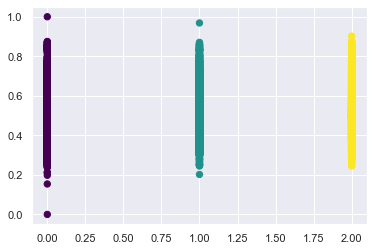

In [16]:
# Plot the clusters
plt.scatter(X_scaled_df['Cluster'], X_scaled_df['tempo'], c=X_scaled_df['Cluster'], s=40, cmap='viridis')
plt.show()

### Save to File

In [17]:
lib.save_model(kmeans, "with-scaling")